In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# import gmaps
import gmaps
# Import the API key.
from config import weather_api_key


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68355746dc15697c0fecdafdecf88a0b


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


623

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | safwah
City not found. Skipping...
Processing Record 2 of Set 1 | taoudenni
Processing Record 3 of Set 1 | caravelas
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | las vegas
Processing Record 6 of Set 1 | deniliquin
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | nargana
Processing Record 13 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | shimoda
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | leningradskiy
Processing R

Processing Record 35 of Set 4 | miramar
Processing Record 36 of Set 4 | longyearbyen
Processing Record 37 of Set 4 | lolua
City not found. Skipping...
Processing Record 38 of Set 4 | kitimat
Processing Record 39 of Set 4 | sorland
Processing Record 40 of Set 4 | henties bay
Processing Record 41 of Set 4 | yagodnoye
Processing Record 42 of Set 4 | port keats
Processing Record 43 of Set 4 | cabo san lucas
Processing Record 44 of Set 4 | isabela
Processing Record 45 of Set 4 | saint-joseph
Processing Record 46 of Set 4 | mayumba
Processing Record 47 of Set 4 | san rafael
Processing Record 48 of Set 4 | yar-sale
Processing Record 49 of Set 4 | bethel
Processing Record 50 of Set 4 | deputatskiy
Processing Record 1 of Set 5 | odoyev
Processing Record 2 of Set 5 | hovd
Processing Record 3 of Set 5 | suntar
Processing Record 4 of Set 5 | bargal
City not found. Skipping...
Processing Record 5 of Set 5 | lavrentiya
Processing Record 6 of Set 5 | gazli
Processing Record 7 of Set 5 | littlehampton

Processing Record 25 of Set 8 | wajir
Processing Record 26 of Set 8 | tingo maria
Processing Record 27 of Set 8 | sabang
Processing Record 28 of Set 8 | valpacos
Processing Record 29 of Set 8 | bozeman
Processing Record 30 of Set 8 | krasnovishersk
Processing Record 31 of Set 8 | tautira
Processing Record 32 of Set 8 | benghazi
Processing Record 33 of Set 8 | micheweni
Processing Record 34 of Set 8 | esna
Processing Record 35 of Set 8 | luau
Processing Record 36 of Set 8 | sitka
Processing Record 37 of Set 8 | vokhma
Processing Record 38 of Set 8 | high rock
Processing Record 39 of Set 8 | kendari
Processing Record 40 of Set 8 | padang
Processing Record 41 of Set 8 | eureka
Processing Record 42 of Set 8 | boundiali
Processing Record 43 of Set 8 | kastamonu
Processing Record 44 of Set 8 | moron
Processing Record 45 of Set 8 | maniitsoq
Processing Record 46 of Set 8 | jinchengjiang
City not found. Skipping...
Processing Record 47 of Set 8 | novyy urgal
Processing Record 48 of Set 8 | dud

Processing Record 12 of Set 12 | campo grande
Processing Record 13 of Set 12 | angoche
Processing Record 14 of Set 12 | salmon arm
Processing Record 15 of Set 12 | jabinyanah
Processing Record 16 of Set 12 | hyeres
Processing Record 17 of Set 12 | praia da vitoria
Processing Record 18 of Set 12 | wah
Processing Record 19 of Set 12 | pozhva
Processing Record 20 of Set 12 | muisne
Processing Record 21 of Set 12 | marawi
Processing Record 22 of Set 12 | tonantins
Processing Record 23 of Set 12 | tougue
Processing Record 24 of Set 12 | noumea
Processing Record 25 of Set 12 | myitkyina
Processing Record 26 of Set 12 | tucuman
Processing Record 27 of Set 12 | maceio
Processing Record 28 of Set 12 | yaring
Processing Record 29 of Set 12 | mariental
Processing Record 30 of Set 12 | pachino
Processing Record 31 of Set 12 | port hedland
Processing Record 32 of Set 12 | saint-pierre
Processing Record 33 of Set 12 | lagunas
Processing Record 34 of Set 12 | paramirim
Processing Record 35 of Set 12 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Taoudenni,22.6783,-3.9836,78.40,20,100,4.65,ML,2021-12-18 00:34:31
1,Caravelas,-17.7125,-39.2481,77.92,83,100,9.78,BR,2021-12-18 00:34:31
2,Vaini,-21.2000,-175.2000,86.16,74,20,11.50,TO,2021-12-18 00:34:31
3,Las Vegas,36.1750,-115.1372,52.16,35,1,3.00,US,2021-12-18 00:32:17
4,Deniliquin,-35.5333,144.9667,97.00,18,100,21.63,AU,2021-12-18 00:34:32
5,Albany,42.6001,-73.9662,43.36,58,100,10.47,US,2021-12-18 00:30:14
6,Mataura,-46.1927,168.8643,58.48,45,61,12.03,NZ,2021-12-18 00:34:32
7,Bengkulu,-3.8004,102.2655,76.55,89,96,8.90,ID,2021-12-18 00:34:33
8,Port Alfred,-33.5906,26.8910,60.15,80,16,20.47,ZA,2021-12-18 00:34:33
9,Port Elizabeth,-33.9180,25.5701,62.89,67,0,19.57,ZA,2021-12-18 00:34:34


In [8]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Taoudenni,ML,2021-12-18 00:34:31,22.6783,-3.9836,78.40,20,100,4.65
1,Caravelas,BR,2021-12-18 00:34:31,-17.7125,-39.2481,77.92,83,100,9.78
2,Vaini,TO,2021-12-18 00:34:31,-21.2000,-175.2000,86.16,74,20,11.50
3,Las Vegas,US,2021-12-18 00:32:17,36.1750,-115.1372,52.16,35,1,3.00
4,Deniliquin,AU,2021-12-18 00:34:32,-35.5333,144.9667,97.00,18,100,21.63
5,Albany,US,2021-12-18 00:30:14,42.6001,-73.9662,43.36,58,100,10.47
6,Mataura,NZ,2021-12-18 00:34:32,-46.1927,168.8643,58.48,45,61,12.03
7,Bengkulu,ID,2021-12-18 00:34:33,-3.8004,102.2655,76.55,89,96,8.90
8,Port Alfred,ZA,2021-12-18 00:34:33,-33.5906,26.8910,60.15,80,16,20.47
9,Port Elizabeth,ZA,2021-12-18 00:34:34,-33.9180,25.5701,62.89,67,0,19.57


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


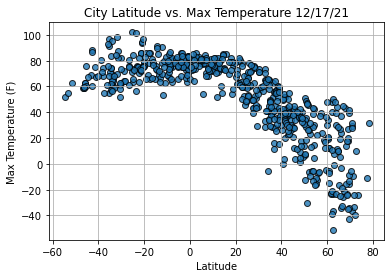

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# plt.gca().invert_yaxis()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

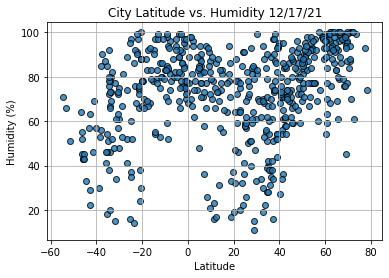

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


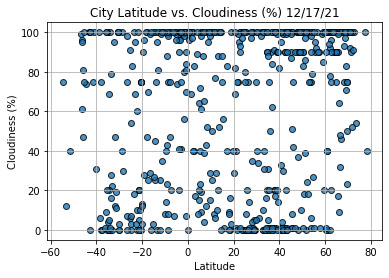

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

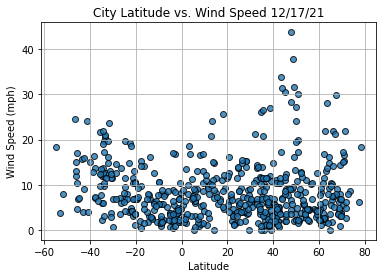

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [15]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
      
        # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
index13=city_data_df.loc[13]
index13

City               Ribeira Grande
Country                        PT
Date          2021-12-18 00:34:35
Lat                       38.5167
Lng                         -28.7
Max Temp                    60.26
Humidity                       52
Cloudiness                    100
Wind Speed                  11.86
Name: 13, dtype: object

In [17]:
city_data_df["Lat"]>= 0

0       True
1      False
2      False
3       True
4      False
       ...  
563     True
564     True
565     True
566    False
567     True
Name: Lat, Length: 568, dtype: bool

In [18]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Taoudenni,ML,2021-12-18 00:34:31,22.6783,-3.9836,78.40,20,100,4.65
3,Las Vegas,US,2021-12-18 00:32:17,36.1750,-115.1372,52.16,35,1,3.00
5,Albany,US,2021-12-18 00:30:14,42.6001,-73.9662,43.36,58,100,10.47
10,Nargana,PA,2021-12-18 00:34:34,9.4428,-78.5906,80.01,87,100,12.97
13,Ribeira Grande,PT,2021-12-18 00:34:35,38.5167,-28.7000,60.26,52,100,11.86


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

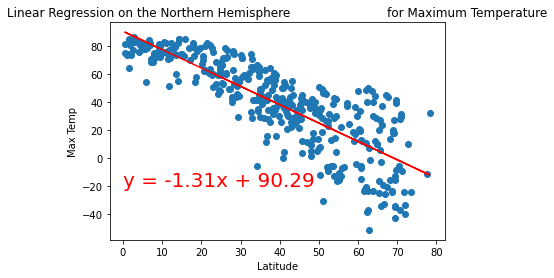

y = -1.31x + 90.29
The r-value is: -0.827


In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-20))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

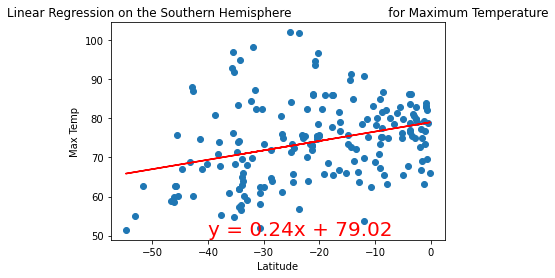

y = 0.24x + 79.02
The r-value is: 0.326


In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-40,50))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values )
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

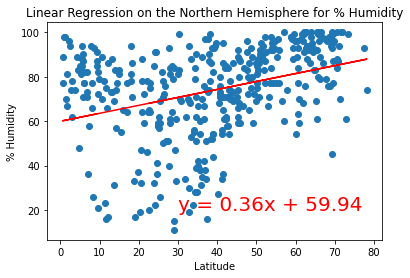

The r-value is: 0.326


In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(30,20))

print(f"The r-value is: {r_value:.3f}")



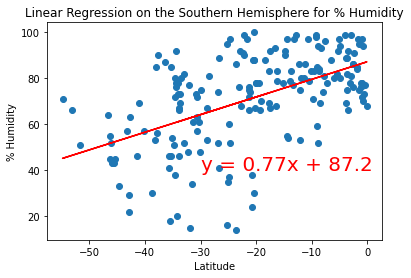

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-30,40))


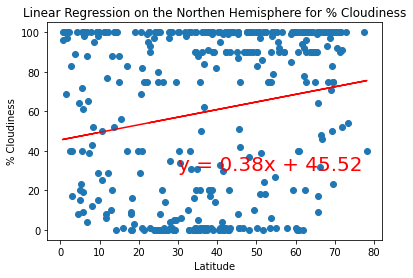

In [24]:
# Linear regression on the Northen Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northen Hemisphere for % Cloudiness','% Cloudiness',(30,30))


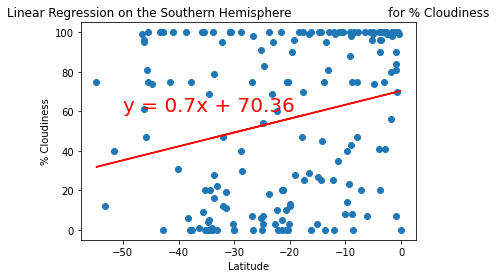

slope is:0.703,intercept is:70.358,r_value is:0.241,P_value is : 0.001,Standard Error is :0.209


In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values )
print(f"slope is:{slope:.3f},intercept is:{intercept:.3f},r_value is:{r_value:.3f},P_value is : {p_value:.3f},Standard Error is :{std_err:.3f}")

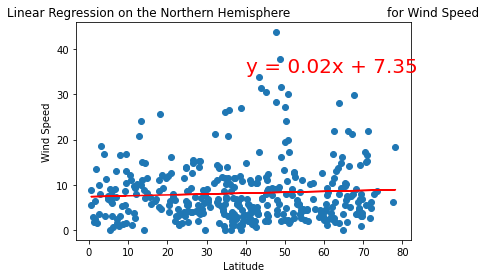

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

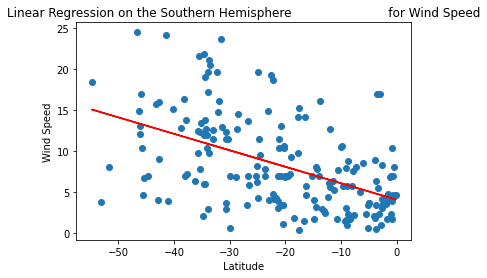

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [28]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
import ipywidgets as widgets

# Import the API key.
from config import gkey

In [29]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()


,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Taoudenni,ML,2021-12-18 00:34:31,22.6783,-3.9836,78.40,20,100,4.65
1,1,Caravelas,BR,2021-12-18 00:34:31,-17.7125,-39.2481,77.92,83,100,9.78
2,2,Vaini,TO,2021-12-18 00:34:31,-21.2000,-175.2000,86.16,74,20,11.50
3,3,Las Vegas,US,2021-12-18 00:32:17,36.1750,-115.1372,52.16,35,1,3.00
4,4,Deniliquin,AU,2021-12-18 00:34:32,-35.5333,144.9667,97.00,18,100,21.63


In [30]:
# get the data types
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [31]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=gkey)

In [32]:
# # 1. Assign the locations to an array of latitude and longitude pairs.
# locations = [latitude, longitude]
# # 2. Assign the weights variable to some values.
# temperatures = # an array of length equal to the locations array length
# # 3. Assign the figure variable to the gmaps.figure() attribute.
# fig = gmaps.figure()
# # 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
# heatmap_layer = gmaps.heatmap_layer(locations, weights=temperatures)

# # 5. Add the heatmap layer.
# fig.add_layer(heatmap_layer)
# # 6. Call the figure to plot the data.
# fig

In [33]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [34]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [35]:
gmaps.__version__

'0.9.0'

In [36]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [37]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [38]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [39]:
import ipywidgets as widgets
widgets.IntSlider()


IntSlider(value=0)